# analysis of MERFISH data
You will work on a MERFISH mouse brain dataset generated by members of the SpaceTx consoritum, the data can be downloaded by running the script `merfish_downloader.sh`. The URLs in the scripts are taken from [this github page](https://github.com/spacetx-spacejam/data), which contains other interesting spatial datasets you can explore.

In [1]:
import pandas as pd
import numpy as np
import anndata as ad
import scanpy as sc
import json
import matplotlib
import matplotlib.pyplot as plt

In [2]:
plt.style.use('dark_background')

## loading the MERFISH spots

In [3]:
df = pd.read_csv('data/merfish/Allen_MERFISH_spots_with_anatomy.csv')

In [4]:
df.iloc[:10]

,Unnamed: 0,Unnamed: 0.1,x_um,y_um,gene,depth_um,layer
0,0,0,1278.683956,6020.642260,Gad2,1445.701599,outside_VISp
1,1,1,1326.970330,6023.884788,Gad2,1403.168094,outside_VISp
2,2,2,1292.026844,6059.337093,Gad2,1413.731426,outside_VISp
3,3,3,1300.886241,6097.786264,Gad2,1385.680938,outside_VISp
4,4,4,1232.410068,6102.884182,Gad2,1440.812721,outside_VISp
5,5,5,1239.018739,6112.164763,Gad2,1430.264991,outside_VISp
6,6,6,1242.494357,6112.306423,Gad2,1427.252525,outside_VISp
7,7,7,1233.548817,6113.698880,Gad2,1434.066228,outside_VISp
8,8,8,1238.239219,6114.846423,Gad2,1429.489336,outside_VISp
9,9,9,1350.081409,6124.715898,Gad2,1329.710342,outside_VISp


In [5]:
print(df.index == df.iloc[:, 0])
print(np.all(df.index == df.iloc[:, 0]))
print(np.all(df.index == df.iloc[:, 1]))
df.drop(columns=[df.columns[0], df.columns[1]], inplace=True)
df

[ True  True  True ...  True  True  True]
True
True


,x_um,y_um,gene,depth_um,layer
0,1278.683956,6020.642260,Gad2,1445.701599,outside_VISp
1,1326.970330,6023.884788,Gad2,1403.168094,outside_VISp
2,1292.026844,6059.337093,Gad2,1413.731426,outside_VISp
3,1300.886241,6097.786264,Gad2,1385.680938,outside_VISp
4,1232.410068,6102.884182,Gad2,1440.812721,outside_VISp
...,...,...,...,...,...
3841407,3161.427603,5192.594981,Mup5,297.777986,outside_VISp
3841408,3099.698528,5221.596008,Mup5,334.424115,outside_VISp
3841409,3084.582240,5297.234605,Mup5,306.740686,outside_VISp
3841410,3054.192051,5342.142346,Mup5,308.399438,VISp_II/III


### plotting all the spots

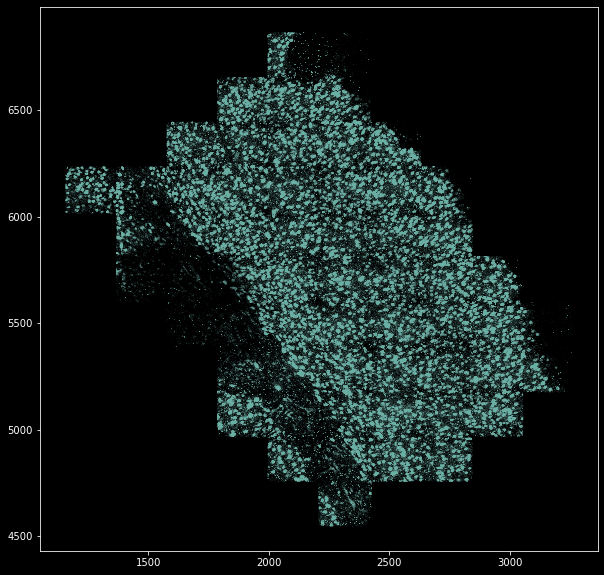

In [6]:
plt.figure(figsize=(10, 10))
plt.scatter(df['x_um'], df['y_um'], alpha=0.1, s=0.01)
plt.show()

### plotting the spots of a smaller region, colored by gene

In [7]:
genes = df['gene'].unique()
genes
random_colors = [np.random.rand(3) for _ in genes]
colors_for_genes = dict(zip(genes, random_colors))

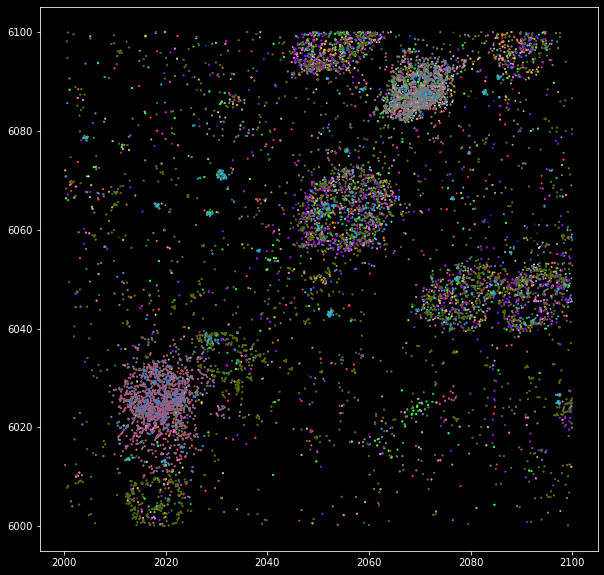

In [8]:
plt.figure(figsize=(10, 10))
smaller_df = df[
    (df['x_um'] > 2000) & 
    (df['x_um'] < 2100) &
    (df['y_um'] > 6000) &
    (df['y_um'] < 6100)
]

genes_colors_list = [colors_for_genes[gene] for gene in smaller_df['gene']]
plt.scatter(smaller_df['x_um'], smaller_df['y_um'], alpha=1, s=1, c=genes_colors_list)
plt.show()

### plotting all the spots, colored by cortex layer

In [9]:
import seaborn as sns
tab10 = sns.color_palette('tab10') 
layers = df['layer'].unique()
layers
print(len(layers))
# random_colors = [np.random.rand(3) for _ in layers]
colors_for_layers = dict(zip(layers, tab10))

8


we need 8 colors, let's start from the palette tab10 and remove some colors that are too similar (why am I doing this? I made the plot with the standard tab10 and it was not good in this case)

In [10]:
print(tab10)
display(tab10)
tab10 = tab10[:4] + tab10[6:]
print(len(tab10))

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

8


In [11]:
if False:
    plt.figure(figsize=(10, 10))
    layers_colors_list = [colors_for_layers[layer] for layer in df['layer']]
    plt.scatter(df['x_um'], df['y_um'], alpha=0.1, s=0.01, c=layers_colors_list)
    layers_patches = [matplotlib.patches.Patch(color=color, label=layer_name) for layer_name, color in colors_for_layers.items()]
    plt.legend(handles=layers_patches)
    plt.show()

## loading the layer data

In [12]:
layers = json.load(open('data/merfish/Allen_MERFISH_Layers.geojson', 'r'))
layers

{'type': 'GeometryCollection',
 'geometries': [{'type': 'Polygon',
   'name': 'L1',
   'coordinates': [[[2435.069566, 6500.284703],
     [2476.390162, 6535.178868],
     [2534.993939, 6471.307336],
     [2743.287325, 6256.796237],
     [2892.512438, 6045.393994],
     [3110.132394, 5597.718655],
     [3175.960311, 5399.368749],
     [3130.896017, 5374.899385],
     [3077.489401, 5557.30352],
     [2850.542875, 6011.196572],
     [2712.19876, 6214.826674],
     [2493.024376, 6434.001058],
     [2435.069566, 6500.284703]]]},
  {'type': 'Polygon',
   'name': 'L4',
   'coordinates': [[[2099.296063, 6218.987584],
     [2143.972428, 6257.045228],
     [2145.859029, 6257.045228],
     [2146.338866, 6256.459168],
     [2151.558392, 6260.866921],
     [2210.003484, 6332.509292],
     [2221.323093, 6321.189682],
     [2222.09221, 6320.430889],
     [2259.341867, 6351.887251],
     [2357.789117, 6236.588669],
     [2668.674769, 5824.665181],
     [2827.226451, 5490.463105],
     [2914.2115, 5257.

In [13]:
layers.keys()

dict_keys(['type', 'geometries'])

In [14]:
brain_layers = {}
for layer in layers['geometries']:
    name = layer['name']
    coordinates = np.array(layer['coordinates'])
    coordinates = np.squeeze(coordinates, 0)
    brain_layers[name] = coordinates

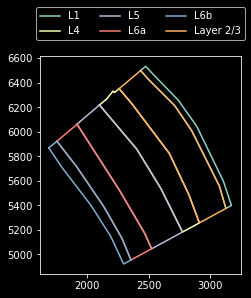

In [15]:
plt.figure()
for layer, coordinates in brain_layers.items():
    plt.plot(coordinates[:, 0], coordinates[:, 1])
plt.gca().set_aspect('equal')
plt.legend([layer for layer in brain_layers.keys()], loc='upper center', bbox_to_anchor=(.5, 1.25), ncol=3)
plt.show()

In [16]:
if False:
    # N_POINTS = 10
    N_POINTS = len(df)

    plt.figure(figsize=(10, 10))
    colors_list = [colors_for_layers[layer] for layer in df['layer']]
    plt.scatter(df['x_um'][:N_POINTS], df['y_um'][:N_POINTS], alpha=0.1, s=0.01, c=colors_list[:N_POINTS])

    for layer, coordinates in brain_layers.items():
        plt.plot(coordinates[:, 0], coordinates[:, 1], linewidth=5)

    old_legend = plt.legend(handles=layers_patches)
    plt.legend([layer for layer in brain_layers.keys()], loc='upper center', bbox_to_anchor=(.5, 1.1), ncol=3)
    plt.gca().add_artist(old_legend)
    plt.show()

## loading the cell locations

In [17]:
df = pd.read_csv('data/merfish/fixed_1001844875.csv')
df.drop(columns=[df.columns[0], df.columns[1]], inplace=True)
df

,1700022I11Rik,1810046K07Rik,5031425F14Rik,5730522E02Rik,Acta2,Adam2,Adamts2,Adamts4,Adra1b,Alk,...,Vwc2,Wipf3,Wnt7b,Zfp804b,area,position,total_reads,simpleClass,x_um,y_um
0,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,170.10,[1161.11337076 6178.3830543 ],870,67,1161.113371,6178.383054
1,0,0,1,1,0,0,0,0,0,0,...,9,1,0,1,206.55,[1162.91337076 6113.1330543 ],454,233,1162.913371,6113.133054
2,0,0,0,1,0,0,0,0,0,0,...,1,2,0,0,184.68,[1168.31337076 6046.0830543 ],269,97,1168.313371,6046.083054
3,0,0,0,0,2,0,0,0,0,0,...,3,0,0,0,87.48,[1163.81337076 6202.6830543 ],340,105,1163.813371,6202.683054
4,0,0,0,1,0,0,0,2,0,0,...,4,3,0,1,155.52,[1166.96337076 6083.8830543 ],241,72,1166.963371,6083.883054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,0,0,0,0,3,1,0,0,0,0,...,3,2,0,0,277.02,[3144.26337076 5201.4330543 ],1062,96,3144.263371,5201.433054
2395,0,0,0,0,6,1,0,1,0,0,...,1,3,1,1,200.07,[3154.61337076 5331.0330543 ],188,0,3154.613371,5331.033054
2396,0,1,0,1,3,2,0,3,0,0,...,8,5,0,0,338.58,[3165.41337076 5190.1830543 ],1322,99,3165.413371,5190.183054
2397,1,0,0,0,0,0,0,2,0,2,...,2,0,0,0,189.54,[3189.71337076 5292.7830543 ],120,96,3189.713371,5292.783054


In [18]:
import math
df['radius'] = df['area'].apply(lambda x: math.sqrt(x / math.pi))

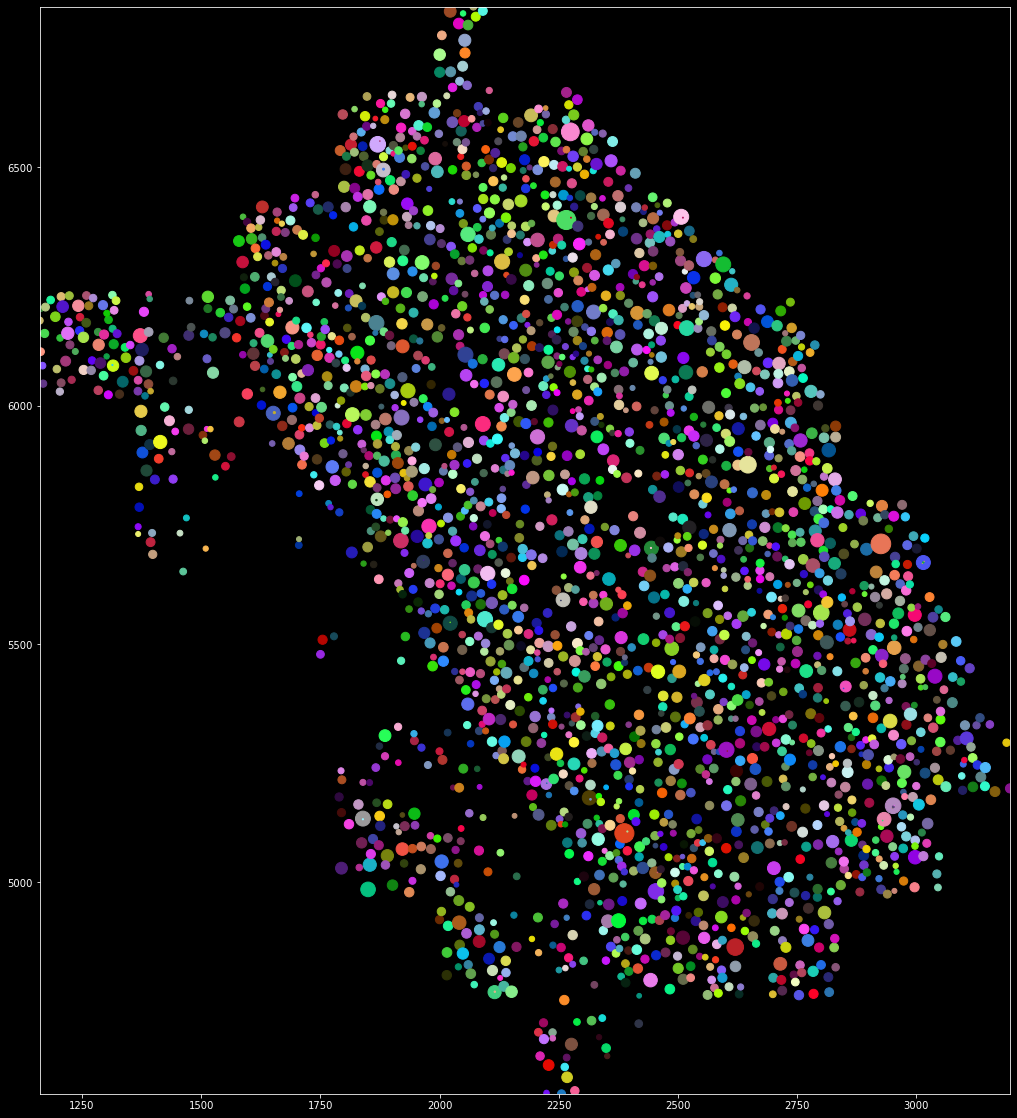

In [19]:
plt.figure(figsize=(20, 20))
# plt.scatter(df['x_um'], df['y_um'], s=df['radius'])
patches = []
for index, row in df.iterrows():
    patch = matplotlib.patches.Circle((row['x_um'], row['y_um']), row['radius'], color=np.random.rand(3))
    patches.append(patch)
p = matplotlib.collections.PatchCollection(patches, match_original=True)
ax = plt.gca()
ax.add_collection(p)
ax.set(
    xlim=(df['x_um'].min(), df['x_um'].max()),
    ylim=(df['y_um'].min(), df['y_um'].max())
)
ax.set_aspect('equal')
plt.show()

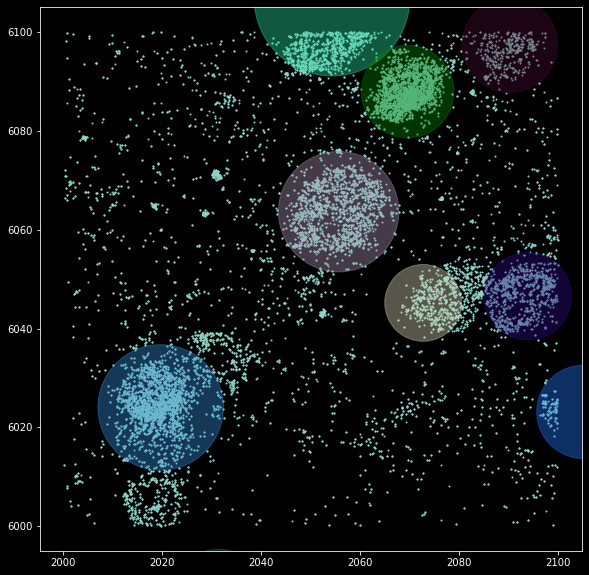

In [20]:
plt.figure(figsize=(10, 10))
plt.scatter(smaller_df['x_um'], smaller_df['y_um'], alpha=1, s=1)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# plt.scatter(df['x_um'], df['y_um'], s=df['radius'])
patches = []
for index, row in df.iterrows():
    patch = matplotlib.patches.Circle((row['x_um'], row['y_um']), row['radius'], color=np.random.rand(3).tolist() + [0.4])
    patches.append(patch)
p = matplotlib.collections.PatchCollection(patches, match_original=True)
ax = plt.gca()
ax.add_collection(p)
ax.set(
    xlim=(df['x_um'].min(), df['x_um'].max()),
    ylim=(df['y_um'].min(), df['y_um'].max())
)
ax.set_aspect('equal')
ax.set(xlim=xlim, ylim=ylim)
plt.show()

### isolating the expression profile

In [21]:
print(df.columns)
gene_columns = df.columns[:df.columns.get_loc('area')]
print(gene_columns)
expression_matrix = df[gene_columns]

Index(['1700022I11Rik', '1810046K07Rik', '5031425F14Rik', '5730522E02Rik',
       'Acta2', 'Adam2', 'Adamts2', 'Adamts4', 'Adra1b', 'Alk',
       ...
       'Wipf3', 'Wnt7b', 'Zfp804b', 'area', 'position', 'total_reads',
       'simpleClass', 'x_um', 'y_um', 'radius'],
      dtype='object', length=275)
Index(['1700022I11Rik', '1810046K07Rik', '5031425F14Rik', '5730522E02Rik',
       'Acta2', 'Adam2', 'Adamts2', 'Adamts4', 'Adra1b', 'Alk',
       ...
       'Unc5b', 'Unc5d', 'Ust', 'Vip', 'Vipr2', 'Vtn', 'Vwc2', 'Wipf3',
       'Wnt7b', 'Zfp804b'],
      dtype='object', length=268)


In [22]:
expression_matrix

,1700022I11Rik,1810046K07Rik,5031425F14Rik,5730522E02Rik,Acta2,Adam2,Adamts2,Adamts4,Adra1b,Alk,...,Unc5b,Unc5d,Ust,Vip,Vipr2,Vtn,Vwc2,Wipf3,Wnt7b,Zfp804b
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,328,0,0,1,0,0,0
1,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,9,1,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,0,14,0,0,3,0,0,0
4,0,0,0,1,0,0,0,2,0,0,...,0,0,1,4,0,0,4,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,0,0,0,0,3,1,0,0,0,0,...,0,1,2,2,0,0,3,2,0,0
2395,0,0,0,0,6,1,0,1,0,0,...,1,2,0,6,1,0,1,3,1,1
2396,0,1,0,1,3,2,0,3,0,0,...,1,2,2,2,1,0,8,5,0,0
2397,1,0,0,0,0,0,0,2,0,2,...,1,0,2,4,0,0,2,0,0,0


In [23]:
adata = ad.AnnData(expression_matrix)
adata

/data/l989o/miniconda3/envs/python3.9/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 2399 × 268

In [24]:
adata.obs.index

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '2389', '2390', '2391', '2392', '2393', '2394', '2395', '2396', '2397',
       '2398'],
      dtype='object', length=2399)

In [25]:
df['x_um'].index

RangeIndex(start=0, stop=2399, step=1)

In [26]:
adata.obsm['x_um'] = df['x_um'].to_numpy()
adata.obsm['y_um'] = df['y_um'].to_numpy()
adata.obsm['radius'] = df['radius'].to_numpy()

In [27]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

IndexError: Positions outside range of features.

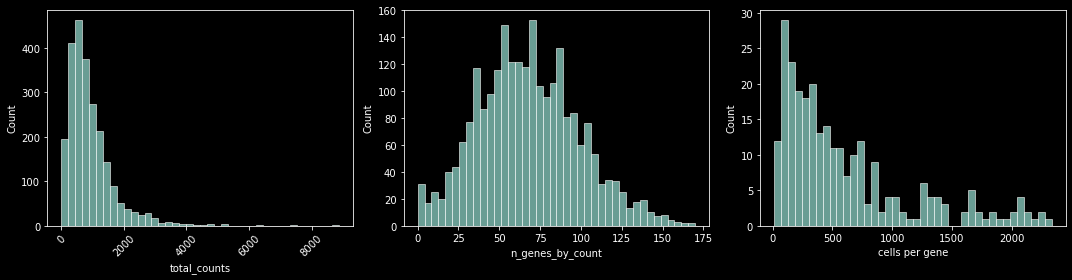

In [28]:
x = adata.X
total_counts = np.sum(x, axis=1)
n_genes_by_count = np.sum(x > 0, axis=1)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(total_counts, kde=False, ax=axes[0], bins=40)
# axes[0].set_yscale('log')
axes[0].set_xlabel('total_counts')
xticks = axes[0].get_xticks()
# print(xticks)
for label in axes[0].get_xticklabels():
    label.set_rotation(45)
# axis[0].set_xticklabels([f'{t:0.2f}' for t in xticks])

sns.histplot(n_genes_by_count, kde=False, ax=axes[1], bins=40)
axes[1].set_xlabel('n_genes_by_count')

sns.histplot(np.sum(x > 0, axis=0), kde=False, ax=axes[2], bins=40)
axes[2].set_xlabel('cells per gene')

plt.tight_layout()
plt.show()

In [29]:
print(sorted(np.sum(x > 0, axis=0)))
np.quantile(np.sum(x > 0, axis=0), q=(0.01, 0.02, 0.05, 0.1))

[11, 24, 29, 36, 38, 42, 47, 48, 50, 56, 58, 68, 72, 75, 76, 78, 80, 88, 89, 90, 90, 91, 93, 94, 94, 95, 97, 100, 100, 101, 108, 109, 112, 112, 114, 114, 119, 123, 125, 126, 127, 132, 134, 135, 137, 138, 139, 141, 146, 147, 148, 149, 151, 155, 157, 161, 164, 164, 168, 169, 173, 175, 178, 184, 188, 188, 197, 198, 204, 218, 221, 224, 224, 225, 227, 231, 234, 234, 234, 235, 235, 235, 242, 246, 255, 258, 261, 261, 262, 264, 264, 272, 276, 287, 291, 292, 292, 298, 298, 299, 299, 306, 306, 309, 312, 316, 326, 330, 339, 339, 340, 340, 341, 342, 349, 353, 354, 356, 356, 356, 357, 360, 365, 368, 373, 384, 386, 389, 391, 398, 398, 402, 404, 404, 423, 424, 428, 428, 437, 447, 454, 456, 458, 463, 463, 464, 467, 469, 479, 481, 481, 492, 492, 499, 504, 508, 516, 525, 531, 537, 541, 545, 546, 550, 551, 559, 561, 572, 572, 582, 602, 606, 617, 625, 632, 641, 646, 651, 653, 653, 666, 678, 687, 688, 693, 701, 707, 715, 717, 722, 724, 724, 727, 732, 733, 740, 740, 763, 766, 771, 804, 818, 825, 825, 829, 8

array([33.69, 43.7 , 75.35, 99.1 ])

In [30]:
%debug

> /data/l989o/miniconda3/envs/python3.9/lib/python3.9/site-packages/scanpy/preprocessing/_qc.py(397)top_segment_proportions()
    395     # Pretty much just does dispatch
    396     if not (max(ns) <= mtx.shape[1] and min(ns) > 0):
--> 397         raise IndexError("Positions outside range of features.")
    398     if issparse(mtx):
    399         if not isspmatrix_csr(mtx):

ipdb> q


In [31]:
sc.pp.calculate_qc_metrics(adata, inplace=True, percent_top=None, log1p=True)

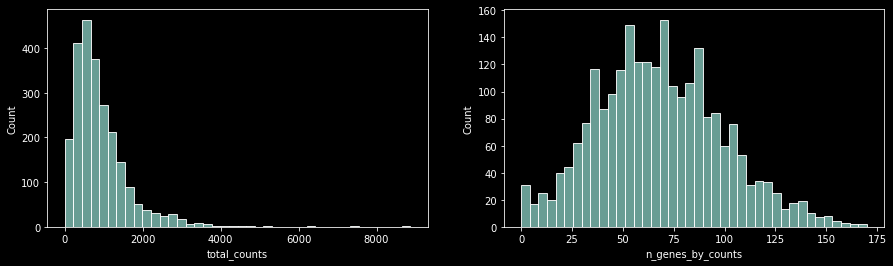

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(adata.obs["total_counts"], kde=False, bins=40, ax=axs[0])
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=40, ax=axs[1])
plt.show()

In [33]:
# skipping sc.pp.filter_cells(adata, min_counts=)
sc.pp.filter_cells(adata, min_genes=10)
# skipping sc.pp.filter_genes(adata, min_cells=)

In [34]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.regress_out(adata, ['total_counts'])

In [35]:
adata.X

array([[-0.08902724, -0.06689031, -0.02202255, ..., -0.88890785,
        -0.02803439, -0.13065514],
       [-0.09488788, -0.06333669,  0.9497388 , ...,  0.09535696,
        -0.02685795,  0.84287953],
       [-0.09749417, -0.06175636, -0.02113349, ...,  1.0078344 ,
        -0.02633477, -0.12720418],
       ...,
       [-0.08265944,  0.37620112, -0.02269118, ...,  0.43648627,
        -0.02931263, -0.13325053],
       [ 1.8756446 , -0.06048355, -0.02091308, ..., -0.86525613,
        -0.0259134 , -0.12634861],
       [-0.0913236 , -0.06549791, -0.02178142, ..., -0.16410102,
        -0.02757343,  0.58994734]], dtype=float32)

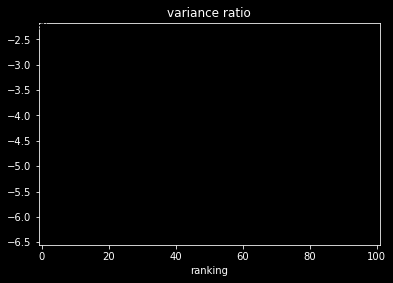

In [36]:
sc.pp.pca(adata, n_comps=100)
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=100)

In [37]:
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=80)
sc.tl.umap(adata)

In [38]:
sc.tl.leiden(adata, random_state=42)

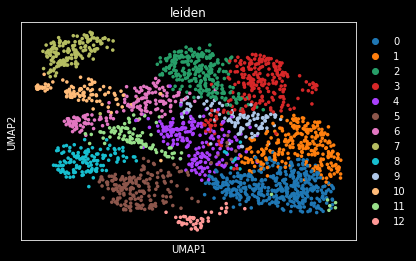

In [39]:
sc.pl.umap(adata, color=['leiden'])

In [40]:
adata

AnnData object with n_obs × n_vars = 2347 × 268
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'leiden'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'x_um', 'y_um', 'radius', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [41]:
adata.obs['leiden']

0       12
1       10
2        1
3        7
4       10
        ..
2394     1
2395    11
2396    11
2397     5
2398     5
Name: leiden, Length: 2347, dtype: category
Categories (13, object): ['0', '1', '2', '3', ..., '9', '10', '11', '12']

In [42]:
adata.uns['leiden_colors']

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8',
 '#ffbb78',
 '#98df8a',
 '#ff9896']

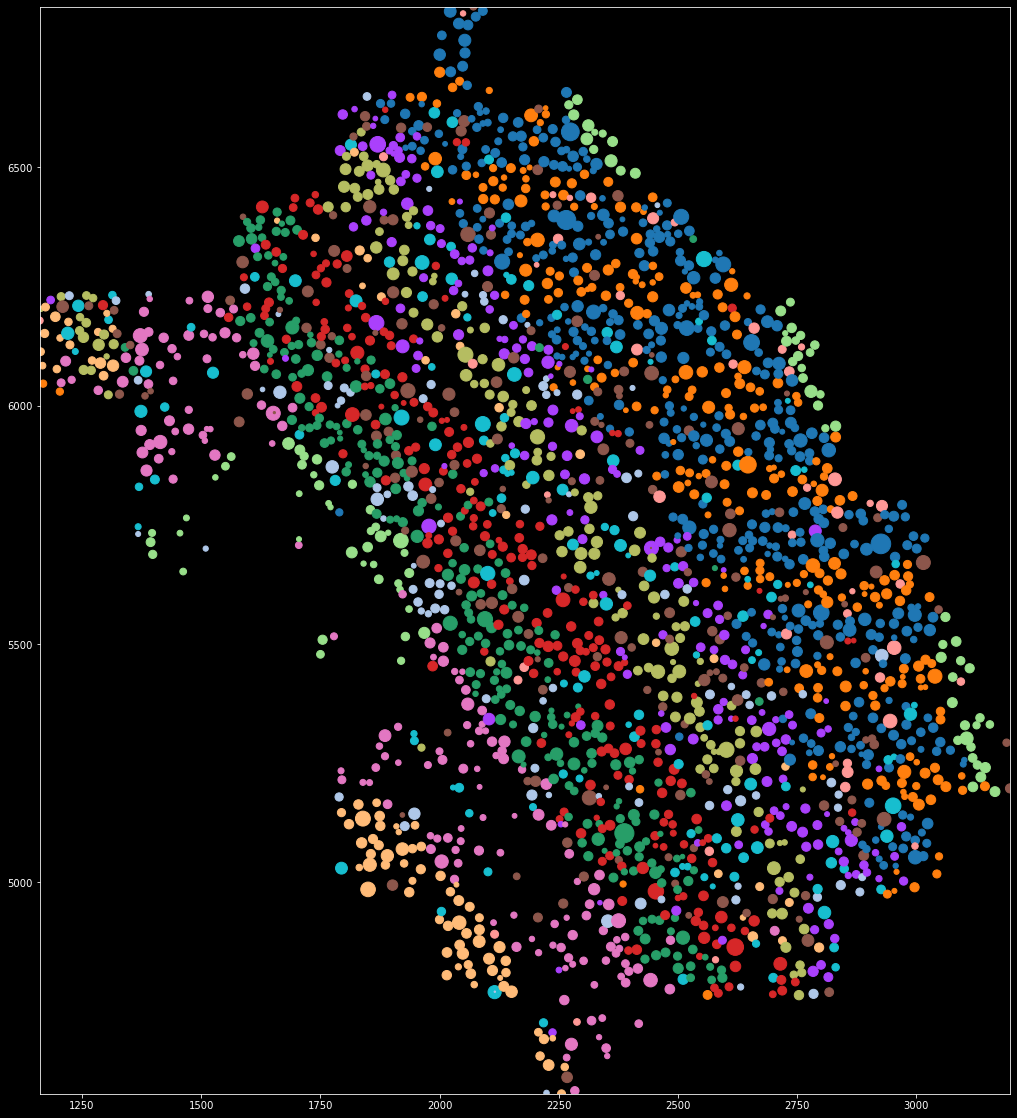

In [60]:
plt.figure(figsize=(20, 20))
# plt.scatter(df['x_um'], df['y_um'], s=df['radius'])
patches = []
for index in adata.obs.index:
    leiden_index = adata[index].obs['leiden']
    hex_color = adata.uns['leiden_colors'][int(leiden_index)]
    rgb_color = matplotlib.colors.to_rgb(hex_color)
    patch = matplotlib.patches.Circle((adata[index].obsm['x_um'], adata[index].obsm['y_um']), adata[index].obsm['radius'], color=rgb_color)
    patches.append(patch)
p = matplotlib.collections.PatchCollection(patches, match_original=True)
ax = plt.gca()
ax.add_collection(p)
ax.set(
    xlim=(df['x_um'].min(), df['x_um'].max()),
    ylim=(df['y_um'].min(), df['y_um'].max())
)
ax.set_aspect('equal')
plt.show()